# Import libraries

In [1]:
! pip install tensorflow
! pip install opencv-python
! pip install pandas
! pip install numpy 
! pip install matplotlib


     -------------------------------------- 284.1/284.1 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 708.3 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 938.4/938.4 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.4 MB/s eta 0:00:00
     ------------------------------------ 440.7/440.7 kB 985.0 kB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 738.0 kB/s eta 0:00:00
     -------------------------------------- 41

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.1 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.1 which is incompatible.


In [2]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import shuffle
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


import cv2

from sklearn.model_selection import train_test_split

# Reading data

In [3]:
import os

BASE_DIR = 'C:\\Users\\samar\\Downloads\\archive (2)\\shapes'
shapes = os.listdir(BASE_DIR)
shapes


['circle', 'square', 'star', 'triangle']

In [1]:
data = []
target = []
for i, shape in enumerate(shapes):
    path = os.path.join(BASE_DIR, shape)
    for filename in os.listdir(path):
        image = cv2.imread(os.path.join(path , filename),0)
        image = image.reshape(200,200,1)
        data.append(image)
        target.append(i)

NameError: name 'shapes' is not defined

# Preprocessing

In [5]:
data = np.array(data)
target = np.array(target)
target = to_categorical(target)

In [6]:
data.shape, target.shape

((14970, 200, 200, 1), (14970, 4))

In [7]:
X_full, X_test, y_full, y_test = train_test_split(data, target, stratify=target, random_state= 42, test_size = 0.25)
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, stratify=y_full, random_state= 42, test_size = 0.15)

Let's check some images to see if everything is alright

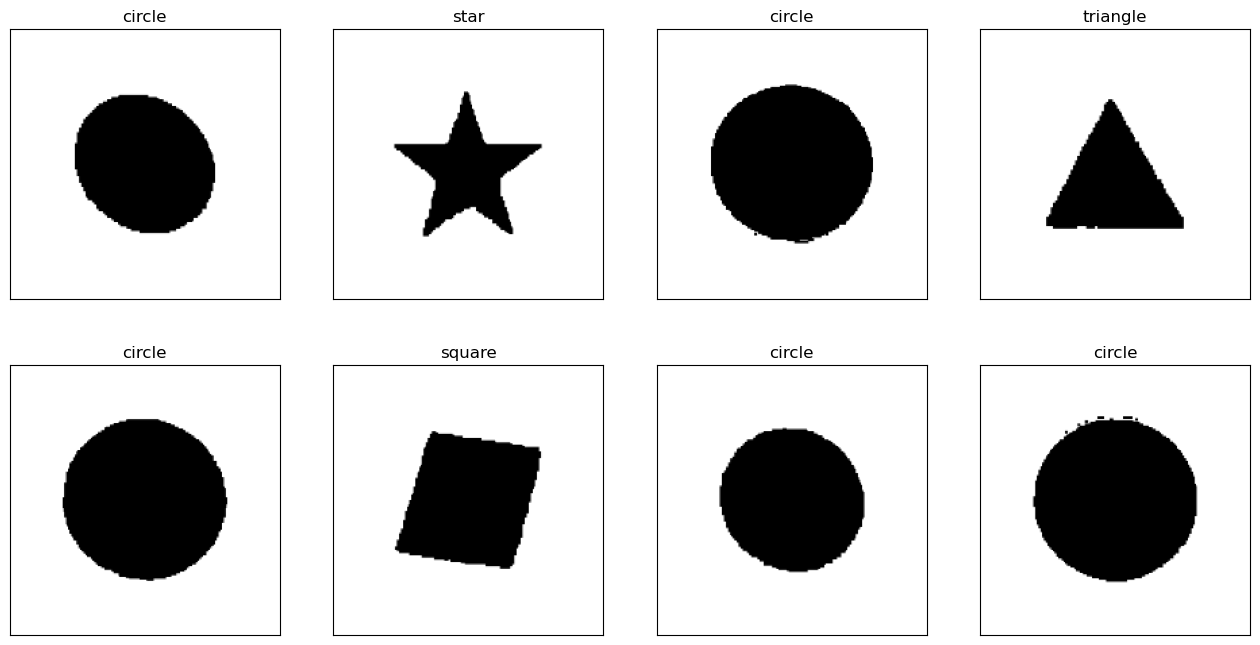

In [8]:
def show_images(count, X, y):
    fig, axes =plt.subplots(count//4,4, figsize = (16, count))
    for i, ind in enumerate(np.random.randint(0, X.shape[0] , count)):
        ax = axes[i//4][i%4] 
        ax.imshow(X[ind],cmap = 'gray')
        ax.title.set_text(shapes[np.argmax(y[ind])])
        ax.set_xticks([]) 
        ax.set_yticks([])
show_images(8, X_train, y_train)

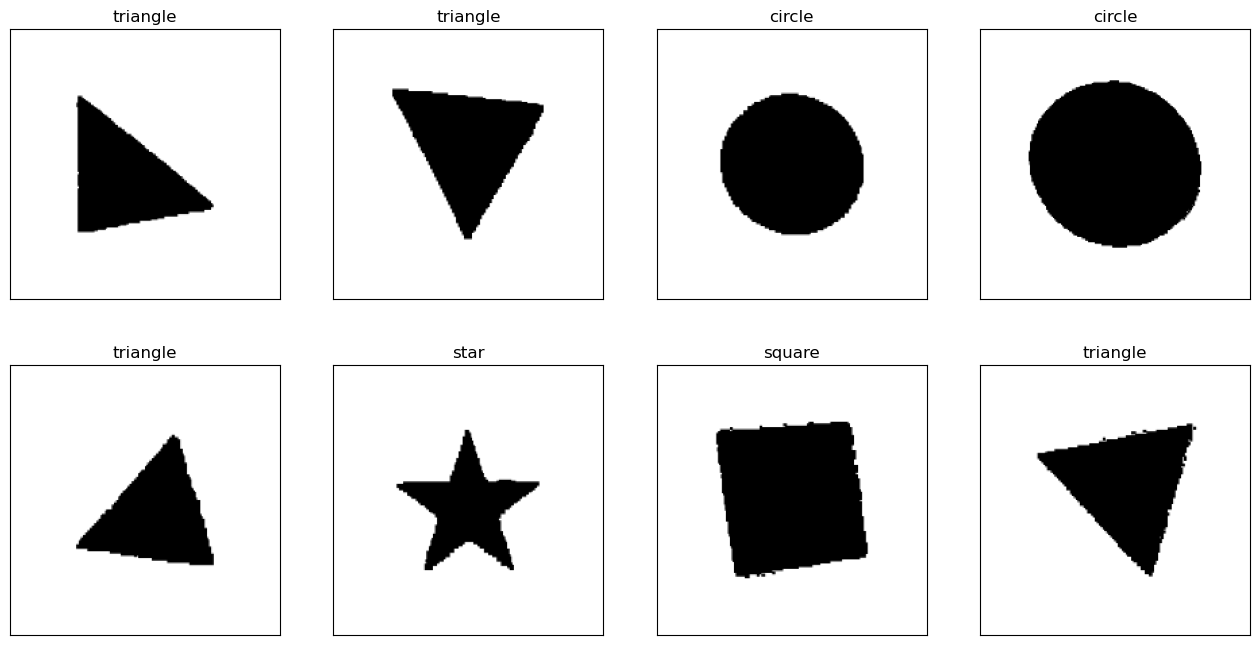

In [9]:
show_images(8, X_val, y_val)

In [10]:
train_datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale = 1.0/255,
    horizontal_flip=True,
    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale = 1.0/255)

In [11]:
X_test = X_test/255.0
X_train = X_train/255.0
X_val = X_val/255.0

# Modelling

In [12]:
model = Sequential([
    Conv2D(32, (3,3),strides = 2 ,input_shape = (200,200,1), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(4, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 99, 99, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 32)        0

In [13]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 5, validation_data = (X_val, y_val))

Epoch 1/5
299/299 [==============================] - 90s 283ms/step - loss: 0.4962 - accuracy: 0.7727 - val_loss: 0.0053 - val_accuracy: 0.9988
Epoch 2/5
299/299 [==============================] - 81s 271ms/step - loss: 0.0490 - accuracy: 0.9839 - val_loss: 5.0886e-04 - val_accuracy: 1.0000
Epoch 3/5
299/299 [==============================] - 84s 280ms/step - loss: 0.0256 - accuracy: 0.9928 - val_loss: 5.4492e-06 - val_accuracy: 1.0000
Epoch 4/5
299/299 [==============================] - 83s 278ms/step - loss: 0.0174 - accuracy: 0.9941 - val_loss: 3.9613e-05 - val_accuracy: 1.0000
Epoch 5/5
299/299 [==============================] - 83s 277ms/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 3.7878e-06 - val_accuracy: 1.0000


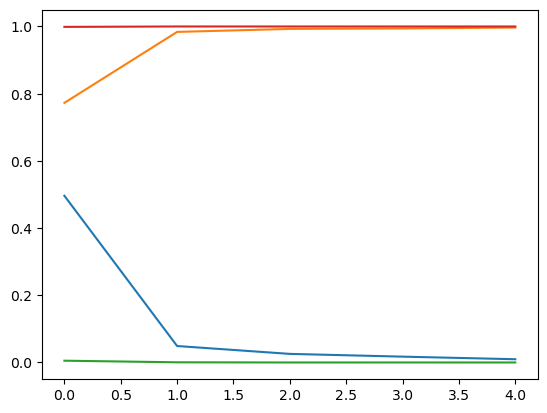

In [14]:
metrics = pd.DataFrame(history.history)
plt.plot(metrics)

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy is {}%'.format(accuracy*100))

117/117 [==============================] - 10s 83ms/step - loss: 2.0882e-05 - accuracy: 1.0000
Accuracy is 100.0%


In [16]:
def show_images_predicted(count, X, y):
    fig, axes =plt.subplots(count//4,4, figsize = (16, count))
    for i, ind in enumerate(np.random.randint(0, X.shape[0] , count)):
        ax = axes[i//4][i%4] 
        ax.imshow(X[ind],cmap = 'gray')
        res=""
        if y[ind][0]==1:
            res+="circle"
        if y[ind][1]==1:
            res+="square"
        if y[ind][2]==1:
            res="star"
        if y[ind][3]==1:
            res="triangle"
        ax.title.set_text(res)
        ax.set_xticks([]) 
        ax.set_yticks([])

117/117 [==============================] - 11s 82ms/step


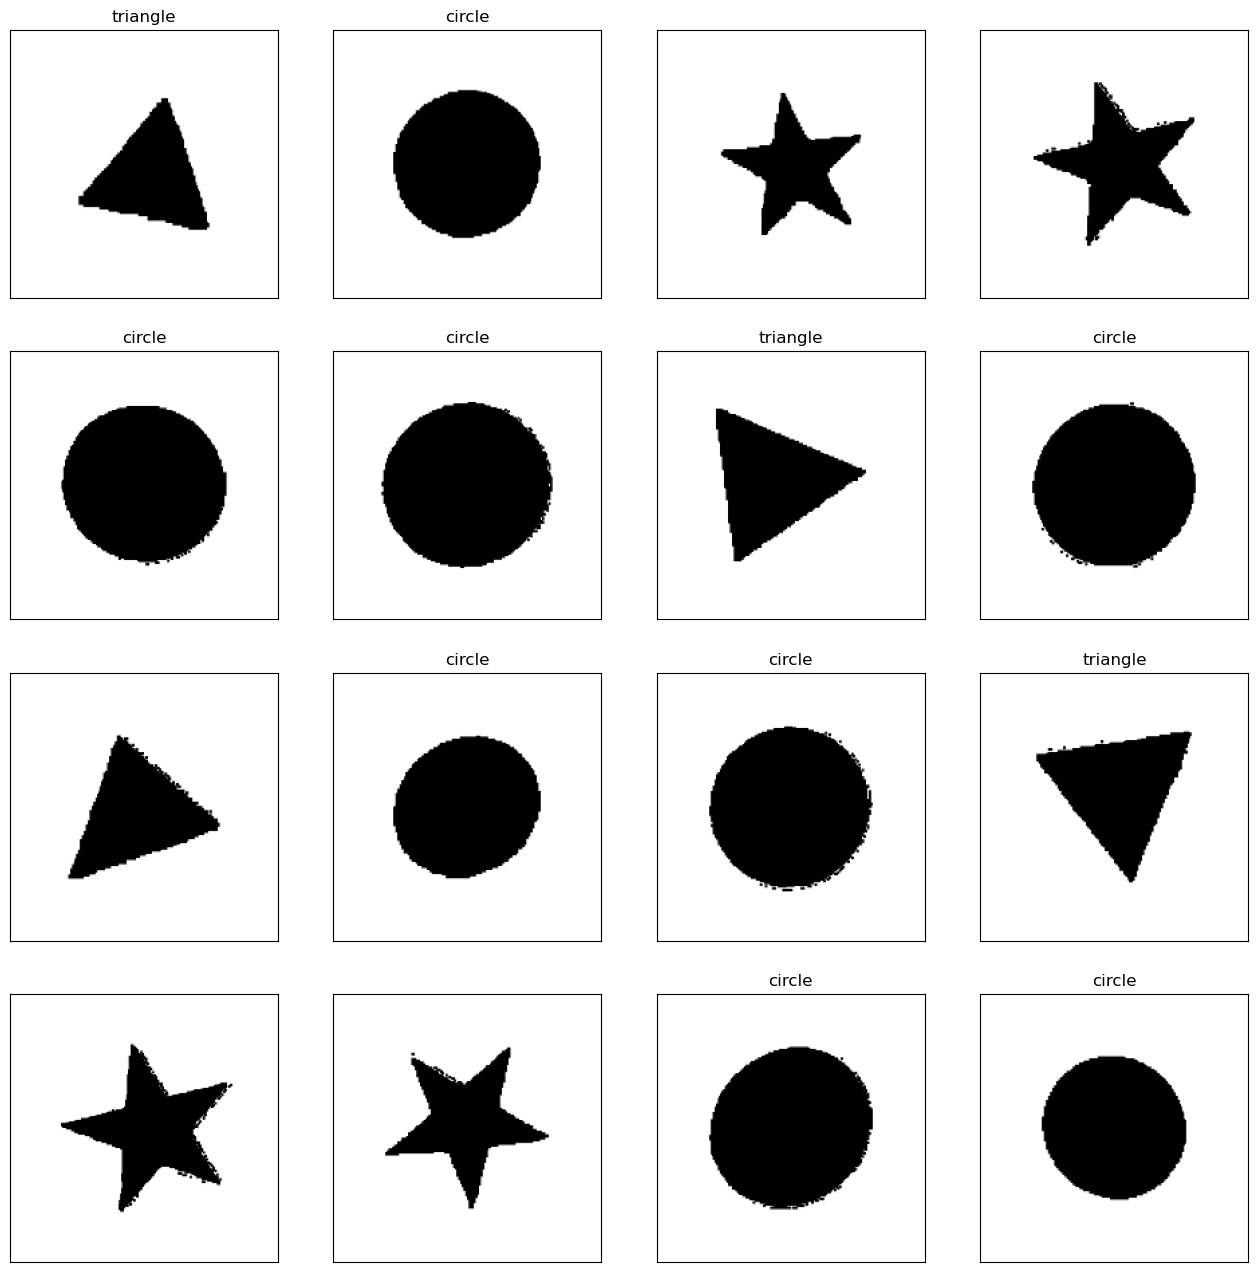

In [17]:
preds = model.predict(X_test)
show_images_predicted(16,X_test, preds)

In [18]:
! pip install pickle-mixin

(3765, 200, 200, 1)
118/118 [==============================] - 10s 81ms/step


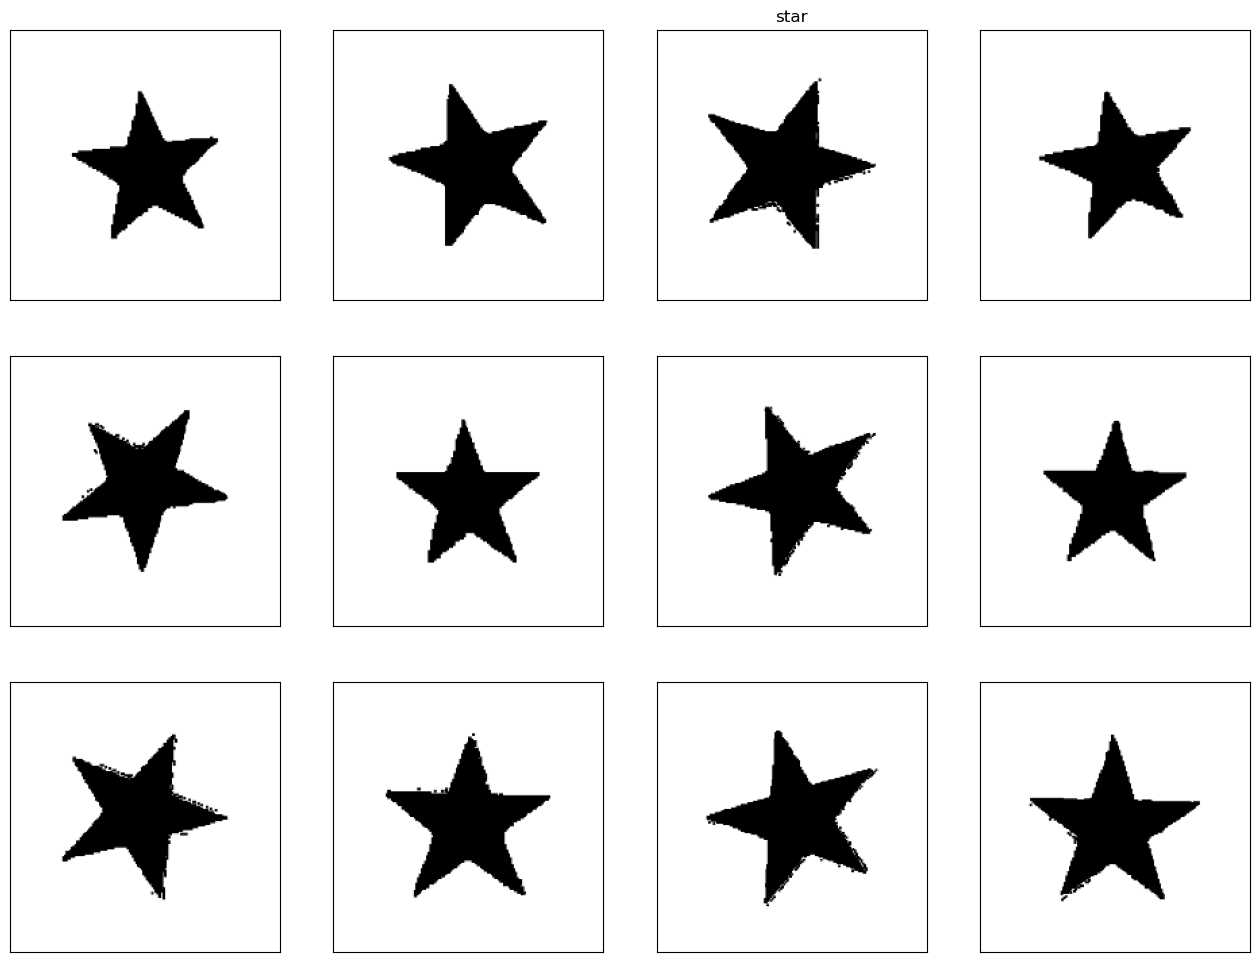

In [20]:
BASE_DIR = r'C:\Users\samar\Downloads\archive (2)\shapes\star'

shapes = os.listdir(BASE_DIR)

data = []

count=12
for filename in shapes:
    image_path = os.path.join(BASE_DIR, filename)
    image = cv2.imread(image_path, 0) 
    image = image.reshape(200, 200, 1)
    data.append(image)

data = np.array(data)
print(data.shape)
data = data/255.0

preds = model.predict(data)

show_images_predicted(count, data, preds)

In [26]:
import cv2
import time
import numpy as np

# Define an empty list to store image data
data1 = []

# Function to make predictions with the model
def predict_with_model(image_data):
    image_data = np.array(image_data)
    y = model.predict(image_data)
    res=""
    if y[-1][0]==1:
        res+="circle"
    if y[-1][1]==1:
        res+="square"
    if y[-1][2]==1:
        res="star"
    if y[-1][3]==1:
        res="triangle"
    cv2.putText(img_gray, res, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Open the camera capture
cap = cv2.VideoCapture(0)

# Set the desired frame width and height
frame_width = 200
frame_height = 200
cap.set(3, frame_width)  # 3 corresponds to frame width
cap.set(4, frame_height)  # 4 corresponds to frame height

while True:
    success, img = cap.read()
    
    # Ensure the captured frame is not None
    if img is not None:
        # Convert the image to grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Resize the image to 200x200 pixels
        img_gray = cv2.resize(img_gray, (frame_width, frame_height))
        
        # Expand the dimensions to match the desired shape (1, 200, 200, 1)
        img_gray = np.expand_dims(img_gray, axis=-1)
        
        # Append the image to the data1 list
        data1.append(img_gray)
    
        if len(data1) > 0:
            preds = predict_with_model(data1)
            print(preds)
        
        # Display the image
        cv2.imshow("Image", img_gray[:, :, 0])
    
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit the loop
        break

# Release the camera
cap.release()
cv2.destroyAllWindows()




1/1 [==============================] - 0s 28ms/step
None
1/1 [==============================] - 0s 41ms/step
None
1/1 [==============================] - 0s 31ms/step
None
1/1 [==============================] - 0s 32ms/step
None
1/1 [==============================] - 0s 36ms/step
None
1/1 [==============================] - 0s 34ms/step
None
1/1 [==============================] - 0s 37ms/step
None
1/1 [==============================] - 0s 38ms/step
None
1/1 [==============================] - 0s 43ms/step
None
1/1 [==============================] - 0s 41ms/step
None
1/1 [==============================] - 0s 43ms/step
None
1/1 [==============================] - 0s 47ms/step
None
1/1 [==============================] - 0s 44ms/step
None
1/1 [==============================] - 0s 41ms/step
None
1/1 [==============================] - 0s 30ms/step
None
1/1 [==============================] - 0s 49ms/step
None
1/1 [==============================] - 0s 48ms/step
None
1/1 [==========================